In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Introduction to Machine Learning

## Live Demos

1. **O**btain data
2. **S**crub
3. **E**xplore
4. **M**odel
5. i**N**terpret

__Има 3 вида Алгоритми за Mашинно обучение:__
1. Supervised learning
2. Unsupervised learning
3. Reinforcment learning

# Exercises

In [3]:
diabetes_data = pd.read_csv("data/diabetic_data.csv", na_values = ["?"])

C:\Users\galin\AppData\Local\Temp\ipykernel_10464\2956128080.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetes_data = pd.read_csv("data/diabetic_data.csv", na_values = ["?"])


In [4]:
diabetes_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
diabetes_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
diabetes_data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
diabetes_data.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [8]:
diabetes_data.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [9]:
diabetes_data.race.value_counts(dropna = False)

Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [10]:
diabetes_data.gender.value_counts(dropna = False)

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [11]:
diabetes_data.age.value_counts(dropna = False)

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [12]:
diabetes_data.age.value_counts(dropna = False) / len(diabetes_data) * 100 # in procents

[70-80)     25.615628
[60-70)     22.092840
[50-60)     16.956547
[80-90)     16.898571
[40-50)      9.516931
[30-40)      3.709490
[90-100)     2.744532
[20-30)      1.628245
[10-20)      0.679009
[0-10)       0.158206
Name: age, dtype: float64

In [13]:
diabetes_data.discharge_disposition_id.value_counts(dropna = False)

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [14]:
diabetes_data.metformin.value_counts(dropna = False)

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [15]:
diabetes_data.patient_nbr

0           8222157
1          55629189
2          86047875
3          82442376
4          42519267
            ...    
101761    100162476
101762     74694222
101763     41088789
101764     31693671
101765    175429310
Name: patient_nbr, Length: 101766, dtype: int64

Това е категорийна променлива според разбирането на Данчо.

Колко са на брой:

In [16]:
diabetes_data.patient_nbr.nunique()

71518

Колко записа средно има един пациент:

In [17]:
diabetes_data.patient_nbr.nunique() / len(diabetes_data)

0.7027690977340173

Колко изобщо има и колко са най-големите:

In [31]:
diabetes_data.patient_nbr.value_counts()

88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64

<AxesSubplot:>

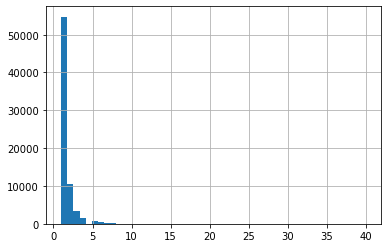

In [34]:
diabetes_data.patient_nbr.value_counts().hist(bins = 50)

Най-много пациенти имат 1 посещение.

In [35]:
diabetes_data[diabetes_data.patient_nbr == 88785891]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
38307,119039172,88785891,Caucasian,Female,[20-30),NaN,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,>30
40252,125094312,88785891,Caucasian,Female,[20-30),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,<30
40661,126171582,88785891,Caucasian,Female,[20-30),NaN,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,>30
44515,137245596,88785891,Caucasian,Female,[20-30),NaN,3,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,<30
45147,139425576,88785891,Caucasian,Female,[20-30),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,<30
45986,141994242,88785891,Caucasian,Female,[20-30),NaN,2,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50167,150986298,88785891,Caucasian,Female,[20-30),NaN,2,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50393,151413846,88785891,Caucasian,Female,[20-30),NaN,1,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50773,152188656,88785891,Caucasian,Female,[20-30),NaN,2,7,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30
51519,153558456,88785891,Caucasian,Female,[20-30),NaN,2,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30


Това е една пациентка, която има 40 записа.

Можем да видим стойностите на инсулин:

In [36]:
diabetes_data[diabetes_data.patient_nbr == 88785891].sort_values("encounter_id").insulin

38307       Up
40252     Down
40661       Up
44515       Up
45147       Up
45986       Up
50167       Up
50393       Up
50773       Up
51519       Up
52057       Up
53771     Down
54497     Down
60263       Up
62759       Up
63165     Down
65667       Up
67968     Down
71029       Up
72068     Down
74405       Up
74876     Down
75267     Down
76525       Up
76907     Down
78355       Up
78882       Up
79202       Up
79467       Up
82693     Down
87063     Down
87854       Up
88392       Up
89964     Down
90913       Up
91444       Up
97433     Down
97732       Up
99950       Up
101385      No
Name: insulin, dtype: object

Можем да видим след колко време е била приета отново:

In [37]:
diabetes_data[diabetes_data.patient_nbr == 88785891].sort_values("encounter_id").readmitted

38307     >30
40252     <30
40661     >30
44515     <30
45147     <30
45986     <30
50167     <30
50393     <30
50773     <30
51519     <30
52057     >30
53771     <30
54497     >30
60263     >30
62759     <30
63165     >30
65667     >30
67968     >30
71029     <30
72068     >30
74405     <30
74876     <30
75267     >30
76525     <30
76907     >30
78355     <30
78882     <30
79202     <30
79467     >30
82693     >30
87063     <30
87854     <30
88392     >30
89964     >30
90913     <30
91444     <30
97433     <30
97732     >30
99950     >30
101385    <30
Name: readmitted, dtype: object

In [38]:
diabetes_data[diabetes_data.patient_nbr == 88785891].sort_values("encounter_id").readmitted.value_counts()

<30    23
>30    17
Name: readmitted, dtype: int64

Тя е пациент за който имаме голяма история. Приемана е често.

Неща като encounter_id, patient_nbr не ни вършат работа, тъй като това са променливи с твърде голяма **ентропия**. Ако всяка една стойсност е еднаква на една променлива тя не ни върши работа защото само хаби място. Ако всяка една стойност е различна тя пак не ни върши работа и това много добре се описва с ентропия. Никаква ентропия означава, че нищо не се случва, всичко е еднакво. Максимална ентропия означава, че всичко е различно. И в двата случая такива променливи не ни вършат работа и един добър feature selection алгоритъм ще ги махне.

In [42]:
attributes = diabetes_data.drop(columns = "readmitted")

In [44]:
target = diabetes_data.readmitted

In [46]:
attributes = attributes.drop(columns = ["encounter_id", "patient_nbr"])

In [48]:
attributes.diag_1.value_counts() # имаме и diag2, diag3

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
817       1
61        1
148       1
870       1
V51       1
Name: diag_1, Length: 716, dtype: int64

Може да ги оставим, може и да видим колко от тях са missing:

In [49]:
attributes.diag_1.value_counts(dropna = False)

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: diag_1, Length: 717, dtype: int64

Ако направим dropna() ще махнем твърде много колони. Това не е добре да го правим. 
Нямаме пациент на който нищо да не му липсва. Разбираме, че във всяка една колона някъде липсва.

Можем да махнем записи на които някои от колоните липсват.

In [50]:
attributes[attributes.weight.isna()]

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


Тази колона изчезва заради много на брой едни и същи стойности - липсващи. Също така няма с какво да я заменим.

In [51]:
attributes = attributes.drop(columns = ["weight"])

In [53]:
attributes = attributes.drop(columns = ["payer_code", "medical_specialty"])

In [54]:
attributes.dropna()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,Steady,No,No,No,No,No,Ch,Yes
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,No,Steady,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,No,No,Up,No,No,No,No,No,Ch,Yes


<AxesSubplot:>

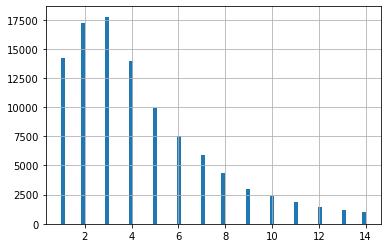

In [57]:
diabetes_data.time_in_hospital.hist(bins = "fd")

<AxesSubplot:>

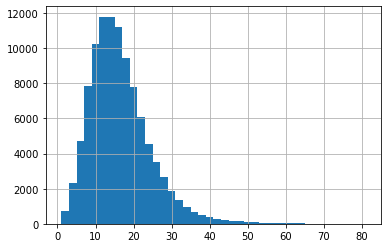

In [62]:
diabetes_data.num_medications.hist(bins = 40)

Как се прави **Z-score**:

<AxesSubplot:>

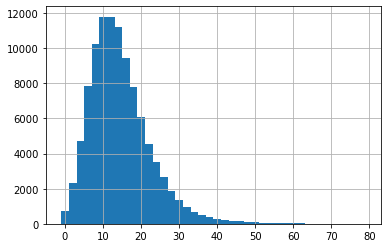

In [64]:
(diabetes_data.num_medications - diabetes_data.num_medications.mean() / diabetes_data.num_medications.std()).hist(bins = 40)

Така имаме представа колко стандартни отклонения от средното - на колко такива е отдалечена всяка една стойност.

Друго нормализиране е **Min-max scaling**:

<AxesSubplot:>

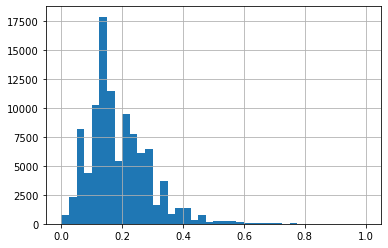

In [65]:
((diabetes_data.num_medications - diabetes_data.num_medications.min()) / (diabetes_data.num_medications.max() - diabetes_data.num_medications.min())).hist(bins = 40)

In [71]:
diabetes_data.metformin

0             No
1             No
2             No
3             No
4             No
           ...  
101761    Steady
101762        No
101763    Steady
101764        No
101765        No
Name: metformin, Length: 101766, dtype: object

In [72]:
pd.get_dummies(diabetes_data.metformin).astype(int)

,Down,No,Steady,Up
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
101761,0,0,1,0
101762,0,1,0,0
101763,0,0,1,0
101764,0,1,0,0


Всяка една стойност става колона. Много подобно на unpivot.

Не може да имаме Machine learning, който приема стрингове.

### Exercise with Titanic dataset

In [18]:
data = pd.read_csv('titanic.csv')

In [19]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [24]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [26]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0


In [27]:
X = data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\galin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, predictions))
